In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.transform import Rotation
from tqdm import tqdm

In [2]:
original_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
original_df.columns = original_df.columns.droplevel(0)
main_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
main_df.columns = main_df.columns.droplevel(0)
df = main_df
# df.head()

In [3]:
original_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
original_df.columns = original_df.columns.droplevel(0)
# original_df

In [4]:
# print('df.columns.levels[0]:', df.columns.levels[0])
# df.columns.levels

In [5]:
# pd.options.mode.chained_assignment = None  # default='warn'

center = df['center']

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
# df

In [6]:
rotated = pd.DataFrame(index=df.index, columns=df.columns)
angles = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])
# angles = np.where(angles<0, angles+2*np.pi, angles)

for bodypart in tqdm(df.columns.levels[0]):
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angles)
    sin = np.sin(angles)
    for axis in bp_df.columns:
        if axis == 'x':
            rotated.loc[:, (bodypart, axis)] = (bp_x * cos) + (bp_y * sin)
        elif axis == 'y':
            rotated.loc[:, (bodypart, axis)] = (bp_y * cos) - (bp_x * sin)
        elif axis == 'likelihood':
            rotated.loc[:, (bodypart, axis)] = bp_likelihood

rotated
df = rotated

100%|███████████████| 13/13 [00:01<00:00,  9.27it/s]


In [ ]:
# df['center']['likelihood'].plot.hist(bins=100)

In [7]:
high_center_likelihood = df.loc[df['center']['likelihood'] > 0.9, :]
high_tailbase_likelihood = high_center_likelihood.loc[high_center_likelihood['center']['likelihood'] > 0.9, :]

In [8]:
skeleton = [['snout', 'left_ear'], ['snout', 'right_ear'], ['right_ear', 'left_ear'], ['left_ear', 'left_side'],
           ['right_ear', 'right_side'], ['right_side', 'tail_base'], ['left_side', 'tail_base'],
            ['tail_base', 'tail_mid'], ['center', 'left_ear'], ['center', 'right_ear'],
           ['center', 'right_side'], ['left_side', 'center'], ['tail_base', 'center'], ['tail_mid', 'tail_tip']]

In [9]:
def plotter(to_plot, skeleton, indexes, plot_original_df=False, original_df=None, lim_min=-800, lim_max=800, limits=True):
    plt.figure(figsize=(32,32))
    indexcounter=1
    for i in indexes:
        
        plt.subplot(4,4,indexcounter)
        
        for bp in df.columns.levels[0]:
            
            plt.scatter(x=to_plot.loc[i, (bp, 'x')], y=to_plot.loc[i, (bp, 'y')], cmap='jet', )
            if plot_original_df:
                plt.scatter(x=original_df.loc[i, (bp, 'x')], y=original_df.loc[i, (bp, 'y')], cmap='jet', marker='*')
        
        for bp_pair in skeleton:
            
            plt.plot([to_plot.loc[i, (bp_pair[0], 'x')], to_plot.loc[i, (bp_pair[1], 'x')]],
                    [to_plot.loc[i, (bp_pair[0], 'y')], to_plot.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)
            if plot_original_df:
                plt.plot([original_df.loc[i, (bp_pair[0], 'x')], original_df.loc[i, (bp_pair[1], 'x')]],
                    [original_df.loc[i, (bp_pair[0], 'y')], original_df.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)

        indexcounter +=1
        if limits:
            plt.xlim(lim_min, lim_max)
            plt.ylim(lim_min, lim_max)
        plt.title('index:' + str(i), fontsize=18)
    
    plt.tight_layout()
    plt.show()

In [10]:
subset = high_tailbase_likelihood.sample(n=20000)
# subset2 = subset.sample(n=16)
# plotter(to_plot=subset2, skeleton=skeleton, indexes=subset2.index, plot_original_df=True, original_df=original_df, limits=False)

In [ ]:
# plotter(to_plot=subset2, skeleton=skeleton, indexes=subset2.index, plot_original_df=True, original_df=original_df,
#         lim_min=-100, lim_max=100)

In [ ]:
# original_df.loc[subset2.index, :]

# angles = np.arctan2(original_df.loc[subset2.index, :][('tail_base', 'y')], original_df.loc[subset2.index, :]['tail_base', 'x'])

# # angles

In [ ]:
# pd.set_option('mode.chained_assignment', None)

# # subset.iloc[8].name
# df = original_df.iloc[[subset.iloc[8].name]]

# center = df['center']
        
# plt.figure()
# plt.subplot(2,2,1)
# for bp in df.columns.levels[0]:
            
#     plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

# for bp_pair in skeleton:

#     plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
#             [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
#             color = 'k', linestyle='-', linewidth=1)

# x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
# x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
# y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
# y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

# plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
# plt.subplot(2,2,2)

# for bodypart in df.columns.levels[0]:
#     for axis in df.columns.levels[1][1:]:
#         df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
# for bp in df.columns.levels[0]:
            
#     plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

# for bp_pair in skeleton:

#     plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
#             [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
#             color = 'k', linestyle='-', linewidth=1)

# x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
# x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
# y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
# y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

# plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
# plt.subplot(2,2,3)

# angle = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])

# for bodypart in df.columns.levels[0]:
#     bp_df = df.loc[:, bodypart]
#     bp_x = bp_df['x']
#     bp_y = bp_df['y']
#     bp_likelihood = bp_df['likelihood']
#     cos = np.cos(angle)
#     sin = np.sin(angle)
#     for axis in bp_df.columns:
#         if axis == 'x':
#             df.loc[:, (bodypart, axis)] = (bp_x * cos) + (bp_y * sin)
#         elif axis == 'y':
#             df.loc[:, (bodypart, axis)] = (bp_y * cos) - (bp_x * sin)
#         elif axis == 'likelihood':
#             df.loc[:, (bodypart, axis)] = bp_likelihood

# for bp in df.columns.levels[0]:
            
#     plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

# for bp_pair in skeleton:

#     plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
#             [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
#             color = 'k', linestyle='-', linewidth=1)
    
# x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
# x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
# y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
# y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

# plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
# plt.subplot(2,2,4)

# for bodypart in df.columns.levels[0]:
#     bp_df = df.loc[:, bodypart]
#     bp_x = bp_df['x']
#     bp_y = bp_df['y']
#     bp_likelihood = bp_df['likelihood']
#     for axis in bp_df.columns:
#         if axis == 'x':
#             df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]
#         elif axis == 'y':
#             df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]*-1  # DON'T FORGET THAT YOU ADDED THIS!!!
#         elif axis == 'likelihood':
#             df.loc[:, (bodypart, axis)] = bp_likelihood
            
# for bp in df.columns.levels[0]:
            
#     plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

# for bp_pair in skeleton:

#     plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
#             [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
#             color = 'k', linestyle='-', linewidth=1)

# x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
# x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
# y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
# y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

# plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
# plt.tight_layout()

tsne fitted in --- 1605.9930500984192 seconds ---


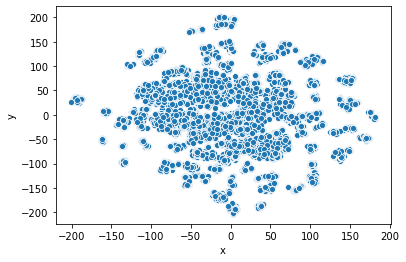

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=20000, n_iter_without_progress=500, init='random', n_jobs=-1)

start_time = time.time()
transformed = tsne.fit_transform(subset)
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))

transformed = pd.DataFrame(transformed, columns=['x','y'])
sns.scatterplot(data=transformed, x='x', y='y')

transformed.index = subset.index

In [12]:
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))

tsne fitted in --- 1606.352460384369 seconds ---
tsne fitted in --- 1606.352460384369 seconds ---
tsne fitted in --- 1606.352460384369 seconds ---
tsne fitted in --- 1606.352460384369 seconds ---
tsne fitted in --- 1606.352460384369 seconds ---
tsne fitted in --- 1606.352460384369 seconds ---


C:\Users\serce\Anaconda3\envs\behaviour-switching\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


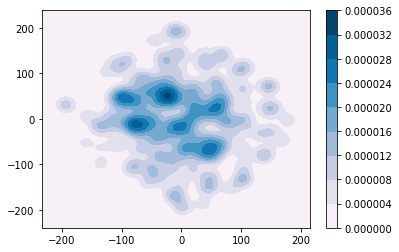

In [13]:
ax = sns.kdeplot(transformed, shade = True, cmap = "PuBu", cbar=True)

In [14]:
from sklearn.neighbors import KernelDensity

In [19]:
transformed = pd.DataFrame(transformed, columns=['x','y'])

kde = KernelDensity(kernel='gaussian', bandwidth=10)
start_time = time.time()
kde.fit(transformed)
print("fitted in --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
scores = kde.score_samples(transformed)
print("scored in --- %s seconds ---" % (time.time() - start_time))
transformed['score'] = np.exp(scores)

fitted in --- 0.0020766258239746094 seconds ---
scored in --- 12.876729726791382 seconds ---


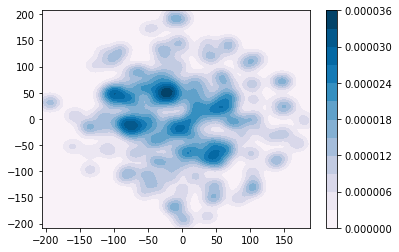

In [20]:
x = np.linspace(transformed['x'].min()-5, transformed['x'].max()+5, 100)
y = np.linspace(transformed['y'].min()-5, transformed['y'].max()+5, 100)
X, Y = np.meshgrid(x, y)

xy = np.vstack([X.ravel(), Y.ravel()]).T

Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, 12, cmap='PuBu')
plt.colorbar()

C:\Users\serce\Anaconda3\envs\behaviour-switching\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


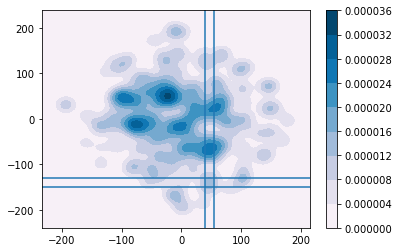

In [40]:
a, b, c, d = -150, -130, 40, 55
ax = sns.kdeplot(transformed, shade = True, cmap = "PuBu", cbar=True)
plt.axhline(a)
plt.axhline(b)
plt.axvline(c)
plt.axvline(d)

Int64Index([27192, 22439, 28779, 65727, 70748, 27211, 27205, 27207, 77850,
            16452, 94454, 94439, 28788, 18977, 39595, 28759],
           dtype='int64')


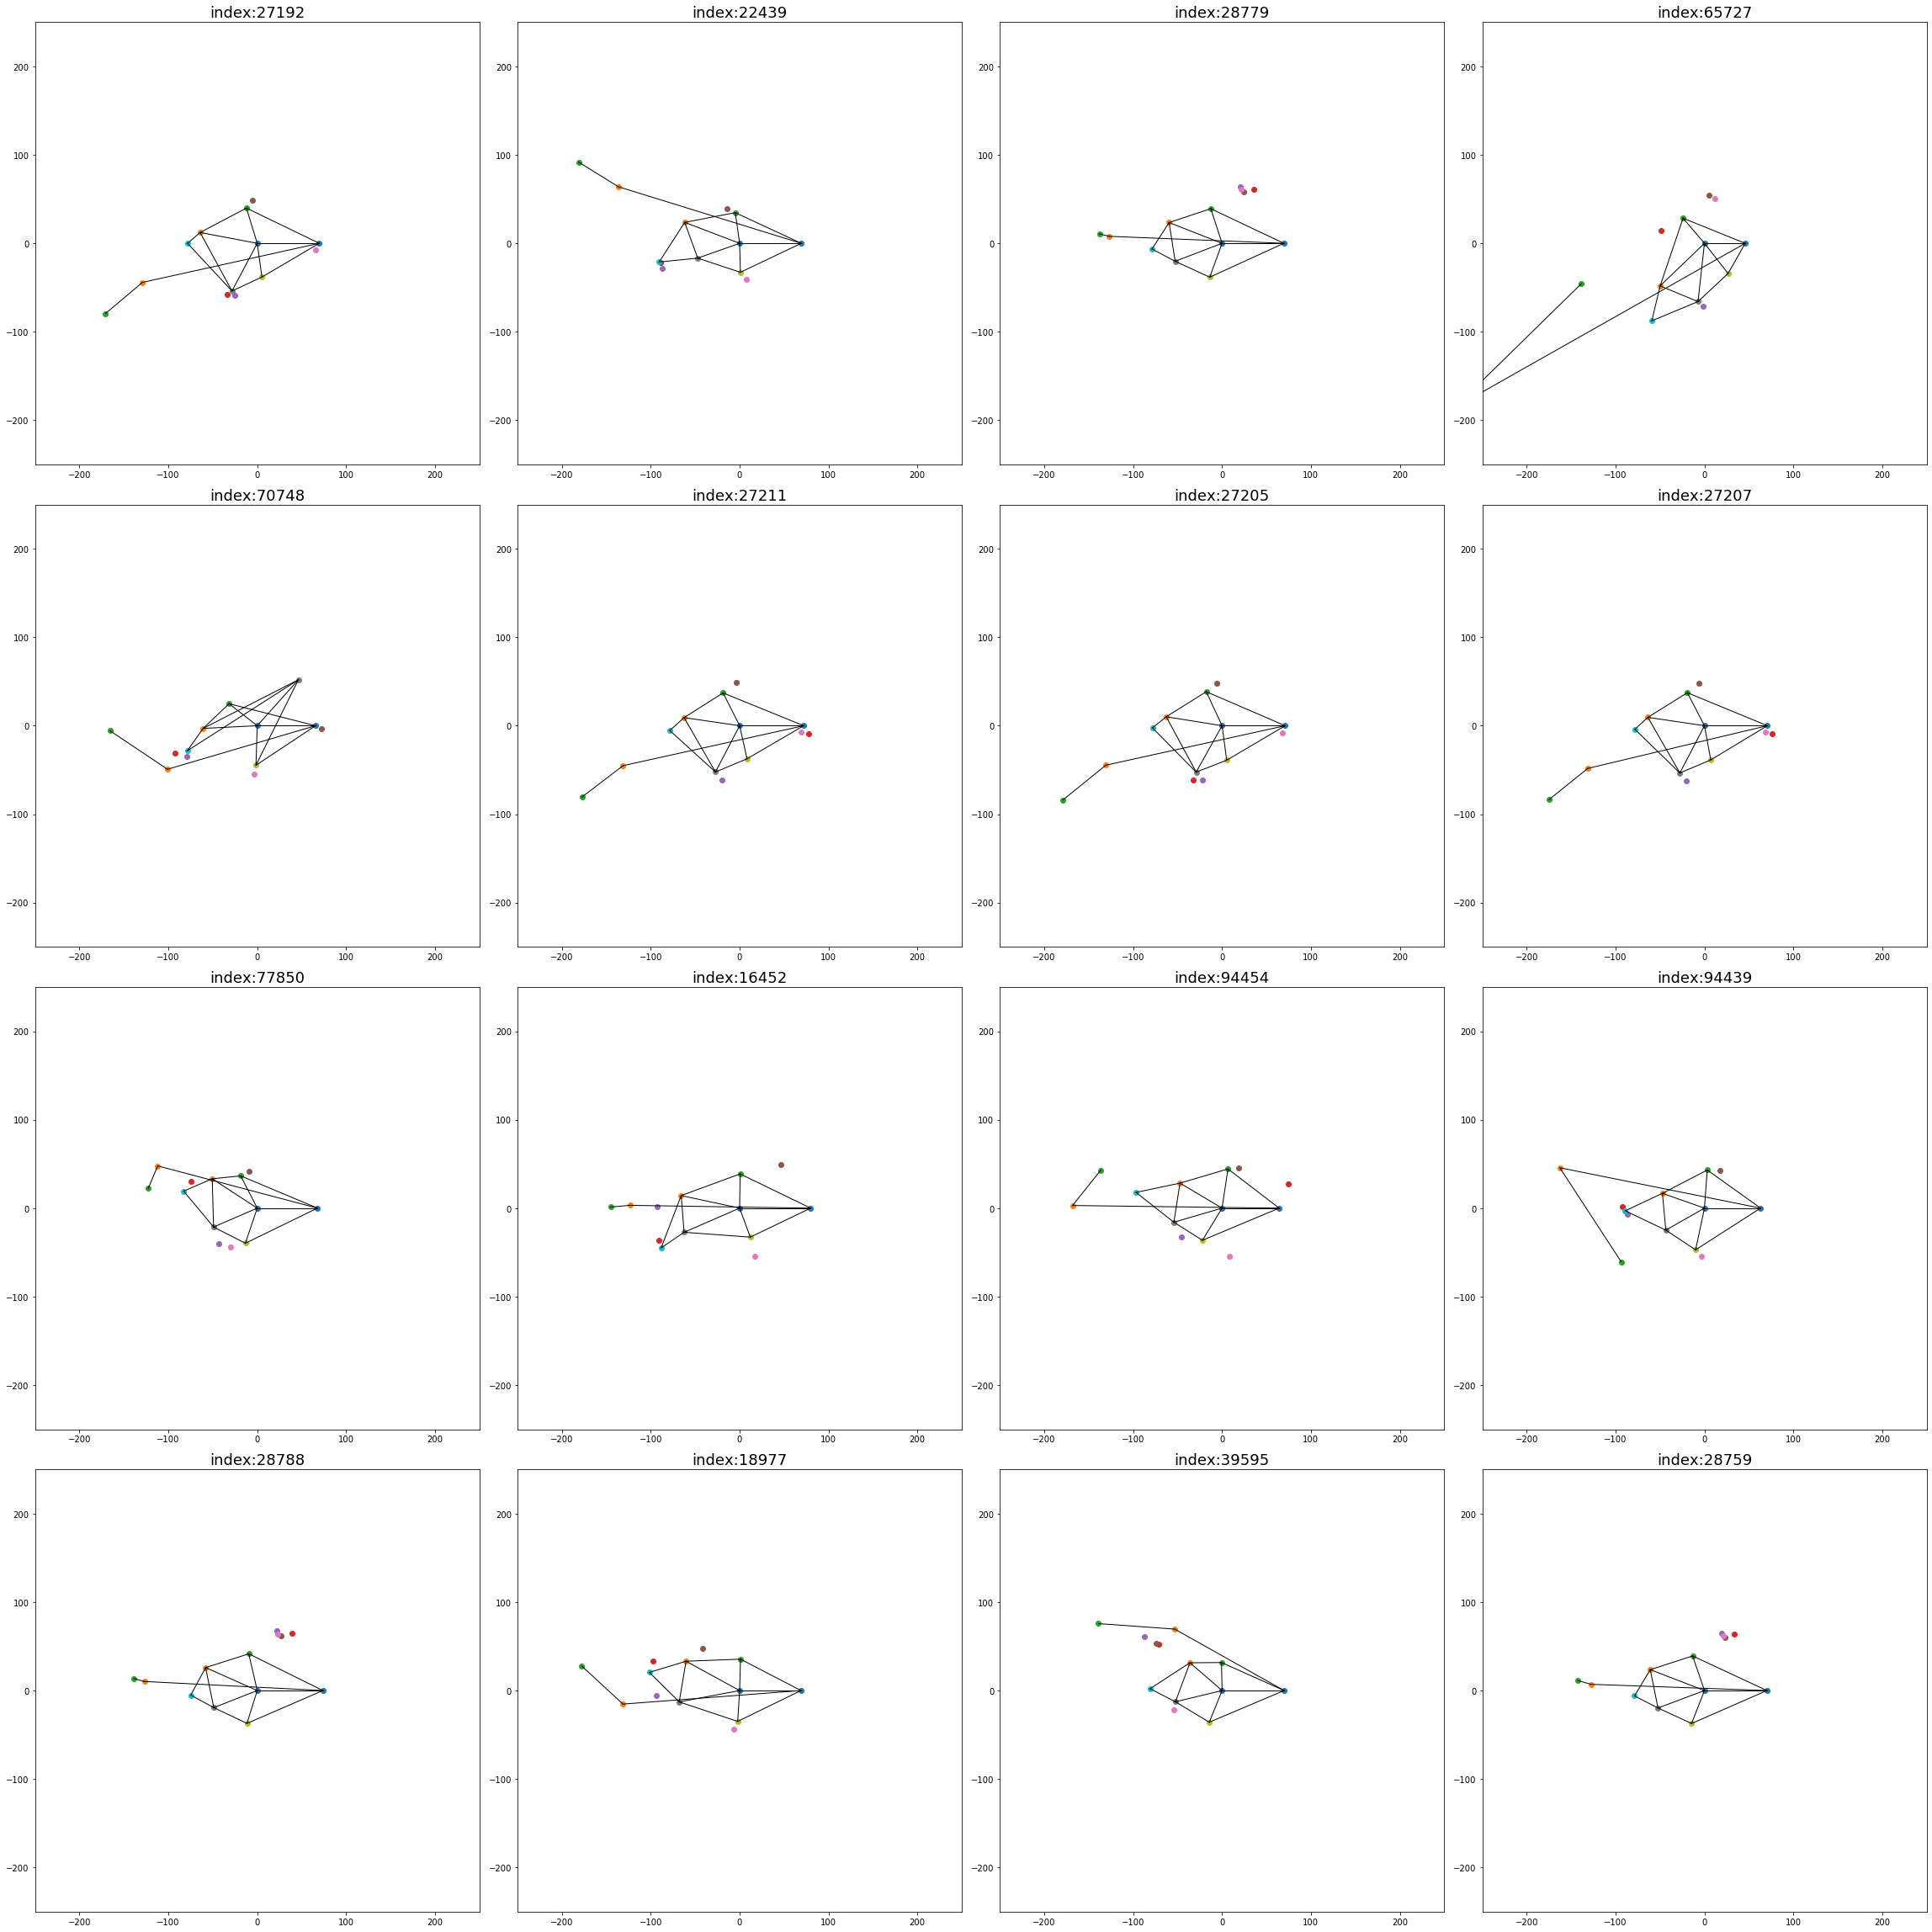

In [38]:
x_filtered = transformed[(transformed['x'] > c) & (transformed['x'] < d)]
y_filtered = x_filtered[(x_filtered['y'] > a) & (x_filtered['y'] < b)]
filtered_subset = y_filtered.sample(16)
print(filtered_subset.index)
plotter(subset, skeleton, filtered_subset.index, lim_min=-250, lim_max=250)

Int64Index([ 58445, 102925,  67067,  96305, 101678,  58341, 101680,  58290,
             67031,  58337,  81420,  56185, 101653,  56227, 101717,  58296],
           dtype='int64')


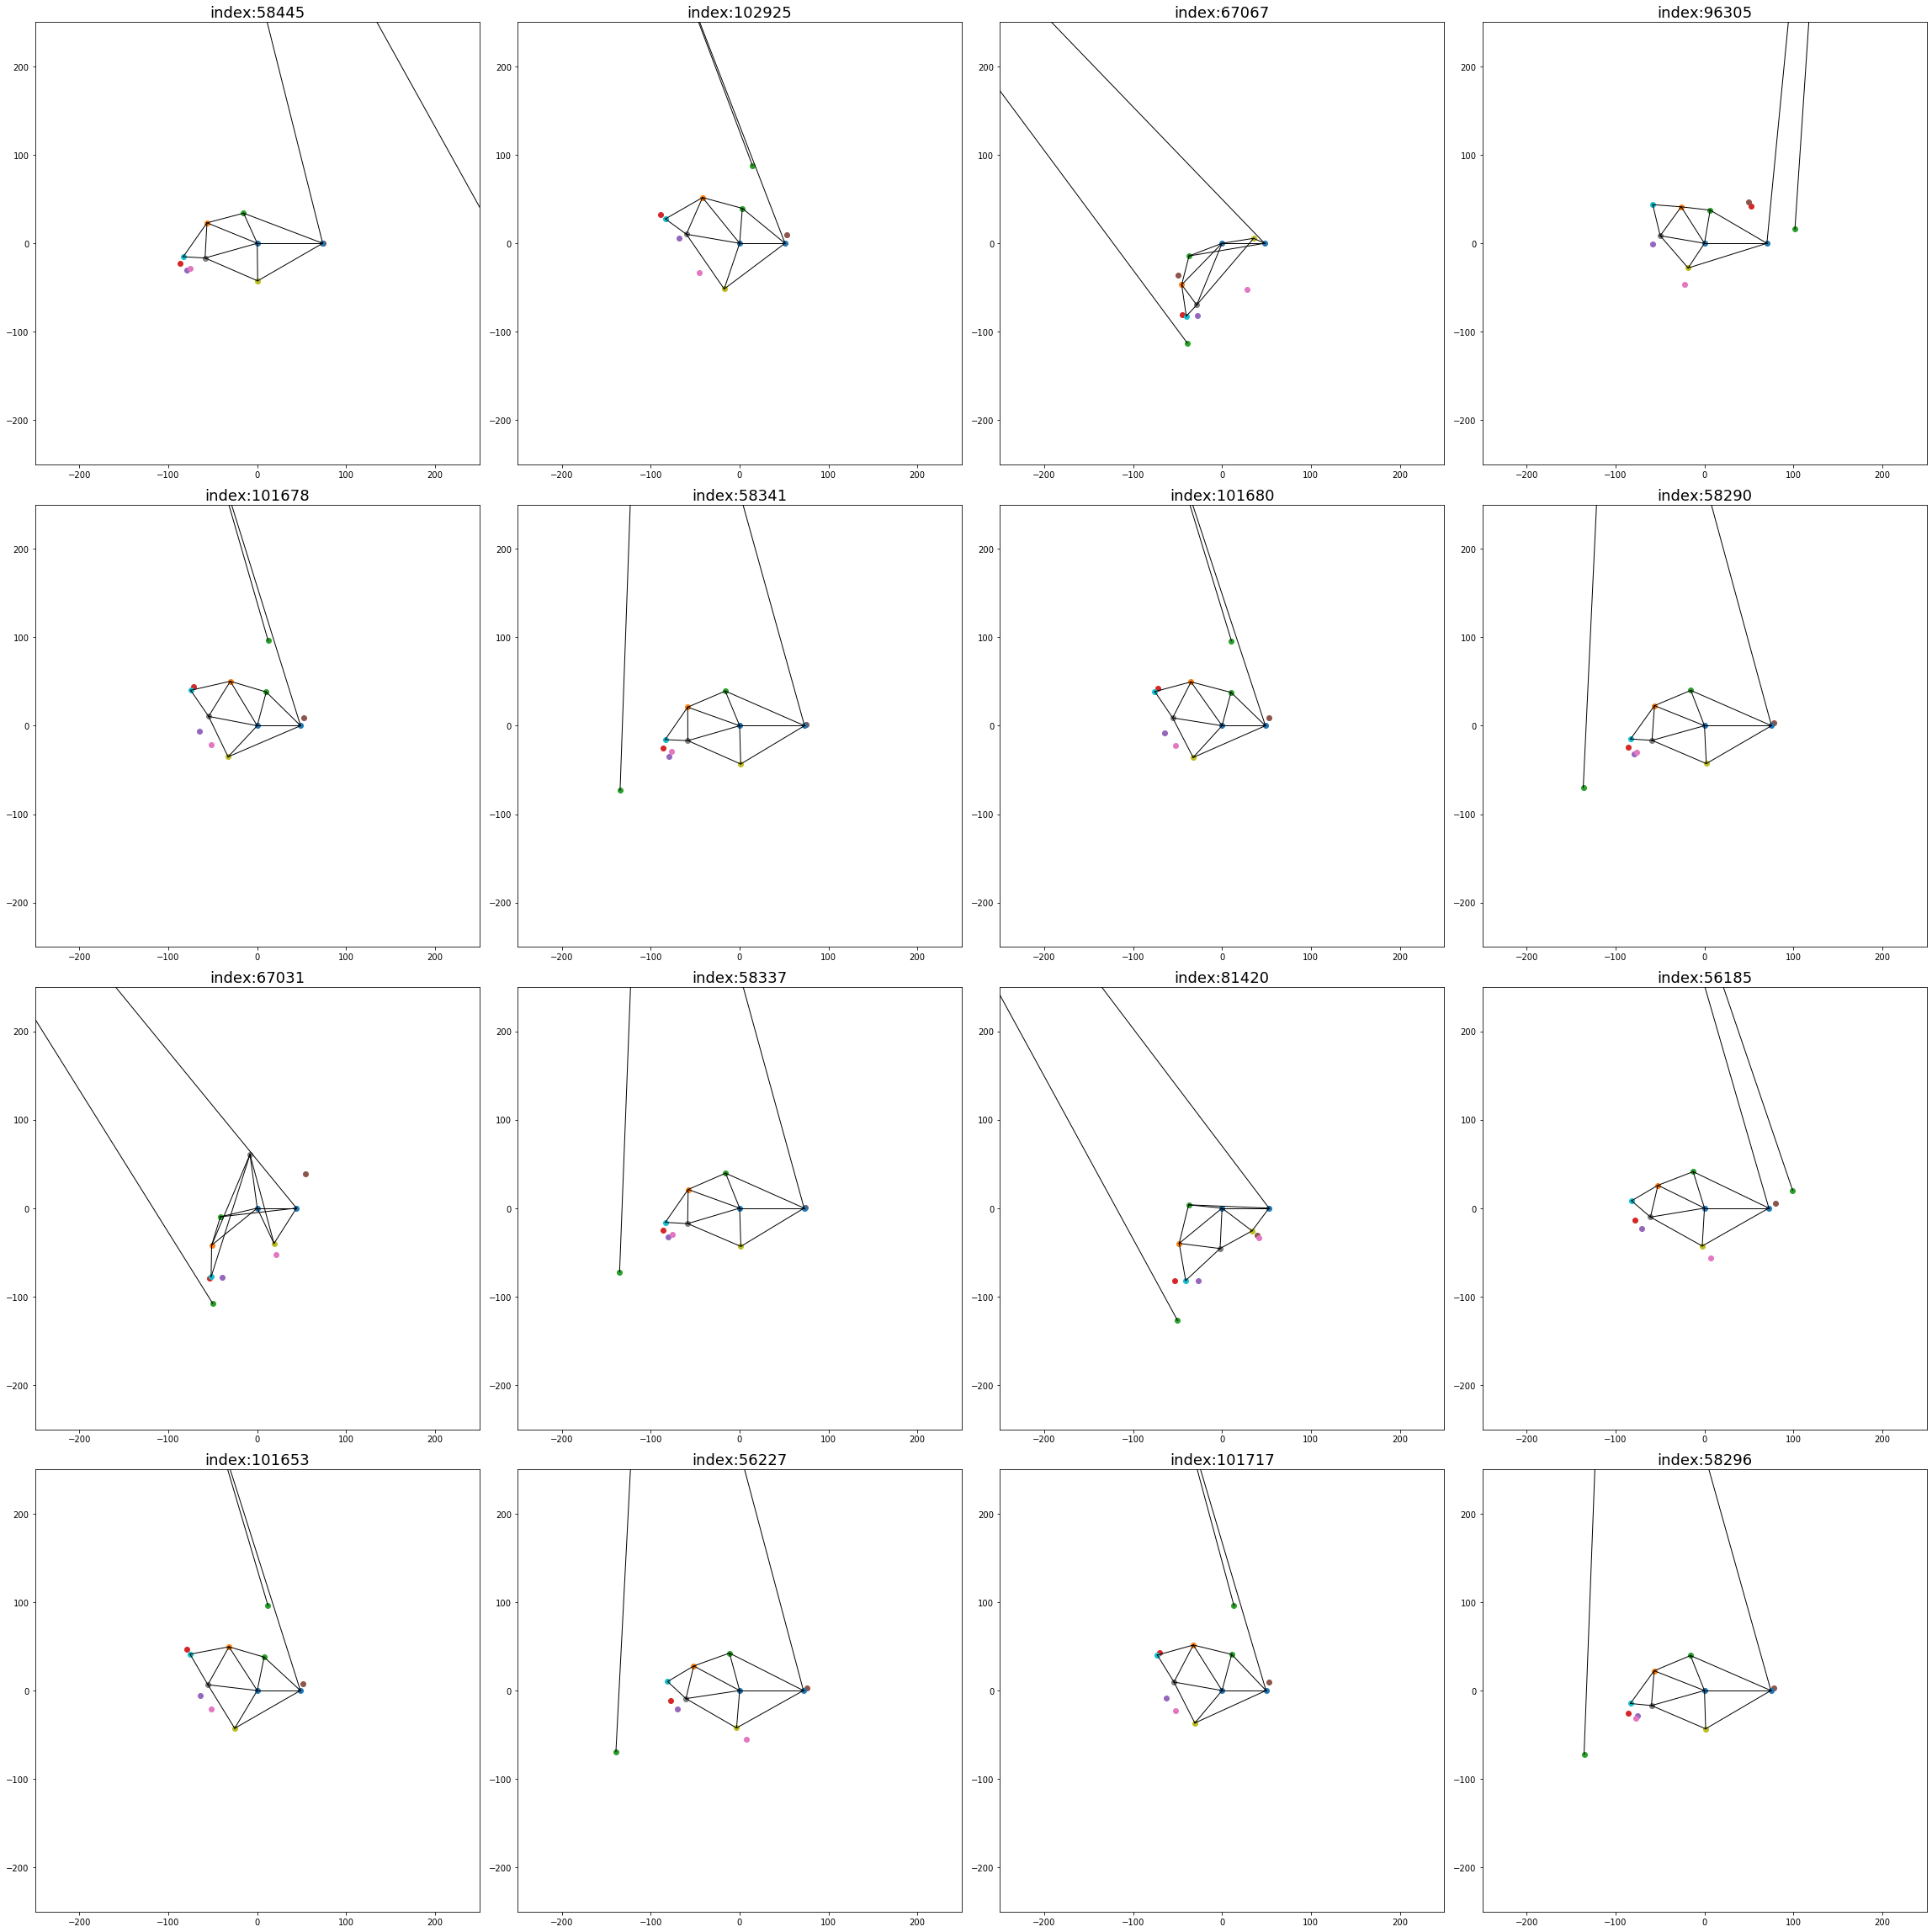

In [42]:
x_filtered = transformed[(transformed['x'] > c) & (transformed['x'] < d)]
y_filtered = x_filtered[(x_filtered['y'] > a) & (x_filtered['y'] < b)]
filtered_subset = y_filtered.sample(16)
print(filtered_subset.index)
plotter(subset, skeleton, filtered_subset.index, lim_min=-250, lim_max=250)

In [46]:
import pims
vid = pims.Video(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3.mp4")
frames = []
for index in filtered_subset.index:
    frames.append(vid[index])
    
outputfolder = r"C:\Users\serce\Desktop\inspect"

for n, frame in enumerate(frames):
    plt.imsave(r"C:\Users\serce\Desktop\inspect" + "\\" + str(n) + ".png", frame)

In [ ]:
print(original_df.iloc[39631])

In [ ]:
plt.imshow(Z)
plt.colorbar()

----------------------------------------

In [47]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=30, init='k-means++', n_init=30, max_iter=3000, tol=0.0001, algorithm='auto')
transformed_km = km.fit_transform(subset)

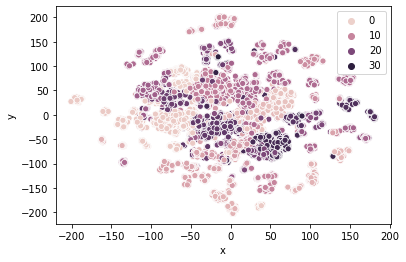

In [48]:
sns.scatterplot(data=transformed, x='x', y='y', hue=km.labels_)

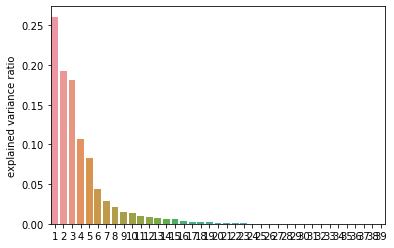

In [54]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, svd_solver='full')

pca_transformed = pca.fit_transform(subset)

expVar = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['explained variance ratio'])
expVar
sns.barplot(data=expVar, y='explained variance ratio', x=list(range(1,40)))

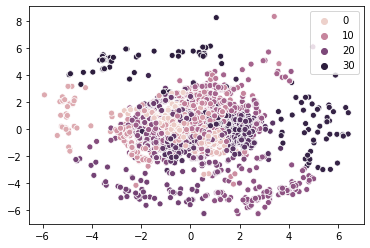

In [55]:
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=km.labels_)

In [ ]:
#index = transformed[transformed['y'] < 28].index

#to_plot = df.iloc[index, :]

#plotter(subset, skeleton, to_plot.index[:16])

In [51]:
pca_transformed.shape

(20000, 39)

# StackOverflow Question

In [ ]:
original_df[:50000].to_hdf(r"C:\Users\serce\Desktop\original_df.hdf", key='original')

In [ ]:
original_df[:50000]

In [ ]:
df = original_df.copy(deep=True)

center = df['center']

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]

In [ ]:
def plotter(to_plot, skeleton, indexes, plot_original_df=False, original_df=None, lim_min=-800, lim_max=800, limits=True):
    plt.figure(figsize=(32,32))
    indexcounter=1
    for i in indexes:
        
        plt.subplot(4,4,indexcounter)
        
        for bp in df.columns.levels[0]:
            
            plt.scatter(x=to_plot.loc[i, (bp, 'x')], y=to_plot.loc[i, (bp, 'y')], cmap='jet', )
            if plot_original_df:
                plt.scatter(x=original_df.loc[i, (bp, 'x')], y=original_df.loc[i, (bp, 'y')], cmap='jet', marker='*')
        
        for bp_pair in skeleton:
            
            plt.plot([to_plot.loc[i, (bp_pair[0], 'x')], to_plot.loc[i, (bp_pair[1], 'x')]],
                    [to_plot.loc[i, (bp_pair[0], 'y')], to_plot.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)
            if plot_original_df:
                plt.plot([original_df.loc[i, (bp_pair[0], 'x')], original_df.loc[i, (bp_pair[1], 'x')]],
                    [original_df.loc[i, (bp_pair[0], 'y')], original_df.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)

        indexcounter +=1
        if limits:
            plt.xlim(lim_min, lim_max)
            plt.ylim(lim_min, lim_max)
    
    plt.tight_layout()
#     plt.savefig(r"C:\Users\serce\Desktop\comparison.png")
    plt.show()
    
subset = df.sample(n=16, random_state=1)
subset2 = subset.copy(deep=True) # This will come in handy later on when plotting the original vs moved vs rotated.
skeleton = [['snout', 'left_ear'], ['snout', 'right_ear'], ['right_ear', 'left_ear'], ['left_ear', 'left_side'],
           ['right_ear', 'right_side'], ['right_side', 'tail_base'], ['left_side', 'tail_base'],
            ['tail_base', 'tail_mid'], ['center', 'left_ear'], ['center', 'right_ear'],
           ['center', 'right_side'], ['left_side', 'center'], ['tail_base', 'center']]
plotter(to_plot=subset, skeleton=skeleton, indexes=subset.index, plot_original_df=True, original_df=original_df,
       limits=False)

In [ ]:
subset = subset2.copy(deep=True)
angles = np.arctan2(subset.loc[:, ('tail_base', 'y')], subset.loc[:, ('tail_base', 'x')]) # in radians

for bodypart in subset.columns.levels[0]:
    bp_df = subset.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angles)
    sin = np.sin(angles)
    for axis in bp_df.columns:
        if axis == 'x':
            subset.loc[:, (bodypart, axis)] = (bp_x * cos) - (bp_y * sin)
        elif axis == 'y':
            subset.loc[:, (bodypart, axis)] = (bp_x * sin) + (bp_y * cos)
        elif axis == 'likelihood':
            subset.loc[:, (bodypart, axis)] = bp_likelihood
            
plotter(to_plot=subset, skeleton=skeleton, indexes=subset.index, plot_original_df=True,
        original_df=original_df.loc[subset.index, :], limits=False)

In [ ]:
pd.set_option('mode.chained_assignment', None)

subset = subset2.copy(deep=True)
idx = subset.iloc[12].name
df = original_df.iloc[[idx]]

center = df['center']
        
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('original' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
plt.subplot(2,2,2)

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('moved' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
plt.subplot(2,2,3)

angle = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])

for bodypart in df.columns.levels[0]:
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angle)
    sin = np.sin(angle)
    for axis in bp_df.columns:
        if axis == 'x':
            df.loc[:, (bodypart, axis)] = (bp_x * cos) - (bp_y * sin)
        elif axis == 'y':
            df.loc[:, (bodypart, axis)] = (bp_x * sin) + (bp_y * cos)
        elif axis == 'likelihood':
            df.loc[:, (bodypart, axis)] = bp_likelihood

for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)
    
x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('moved and rotated' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
plt.subplot(2,2,4)

for bodypart in df.columns.levels[0]:
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    for axis in bp_df.columns:
        if axis == 'x':
            df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]
        elif axis == 'y':
            df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]*-1  # DON'T FORGET THAT YOU ADDED THIS!!!
        elif axis == 'likelihood':
            df.loc[:, (bodypart, axis)] = bp_likelihood
            
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('moved, rotated and mirrored around X' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
plt.tight_layout()
plt.savefig(r"C:\Users\serce\Desktop\distances.png")

In [ ]:
subset.to_numpy()